# Classifier Guidance




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import wandb

# Define the model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64 * 6 * 6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [ ]:

# # Initialize wandb
# wandb.init(project="fashion-mnist-classifier")

# # Hyperparameters
# config = wandb.config
# config.batch_size = 100
# config.learning_rate = 0.001
# config.num_epochs = 25
# config.test_every_n_epochs = 3  # Test every 3 epochs

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else "mps" if torch.mps.is_available() else 'cpu')

# # Load FashionMNIST dataset
# train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ]), download=True)

# test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ]))

# train_loader = DataLoader(dataset=train_dataset, batch_size=config.batch_size, shuffle=True)
# test_loader = DataLoader(dataset=test_dataset, batch_size=config.batch_size, shuffle=False)

# # Initialize model, loss function, and optimizer
# model = FashionCNN().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

# # Watch the model
# wandb.watch(model)

# # Training loop
# for epoch in range(config.num_epochs):
#     model.train()
#     epoch_loss = 0
#     epoch_accuracy = 0
#     for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{config.num_epochs} (Train)")):
#         images = images.to(device)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Calculate accuracy
#         _, predicted = torch.max(outputs.data, 1)
#         batch_accuracy = (predicted == labels).sum().item() / labels.size(0)

#         epoch_loss += loss.item()
#         epoch_accuracy += batch_accuracy
#         wandb.log({"batch_loss": loss.item(), "batch_accuracy": batch_accuracy})

#     avg_epoch_loss = epoch_loss / len(train_loader)
#     avg_epoch_accuracy = epoch_accuracy / len(train_loader)
#     wandb.log({"epoch": epoch + 1, "epoch_loss": avg_epoch_loss, "epoch_accuracy": avg_epoch_accuracy})
#     print(f'Epoch [{epoch+1}/{config.num_epochs}], Train Loss: {avg_epoch_loss:.4f}, Train Accuracy: {avg_epoch_accuracy:.4f}')

#     # Test during training
#     if (epoch + 1) % config.test_every_n_epochs == 0:
#         model.eval()
#         with torch.no_grad():
#             correct = 0
#             total = 0
#             test_loss = 0
#             for images, labels in tqdm(test_loader, desc=f"Epoch {epoch+1}/{config.num_epochs} (Test)"):
#                 images = images.to(device)
#                 labels = labels.to(device)
#                 outputs = model(images)
#                 loss = criterion(outputs, labels)
#                 test_loss += loss.item()

#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()

#             avg_test_loss = test_loss / len(test_loader)
#             test_accuracy = 100 * correct / total
#             wandb.log({"epoch": epoch + 1, "test_loss": avg_test_loss, "test_accuracy": test_accuracy})
#             print(f'Epoch [{epoch+1}/{config.num_epochs}], Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f} %')

# wandb.finish()

# # Save the model checkpoint
# torch.save(model.state_dict(), 'fashion_mnist_cnn.pt')

<img src="references/classifier_guided_DDPM.png" alt="Positional Embedding">
<figcaption>From Calvo (2018) in <a href="https://medium.com/dissecting-bert/dissecting-bert-part-1-d3c3d495cdb3">Dissecting BERT Part 1: The Encoder</a> (different blog post from the one previously mentioned)</figcaption>

In [ ]:
diffusion_model = Unet(
    max_steps=config_dict["max_steps"],
    channels=config_dict["model_channels"],
    image_shape=config_dict["image_shape"],
    dim_mults=config_dict["model_dim_mults"],
).to(config_dict["device"])
assert isinstance(data_folder, Path)
MODEL_FILENAME = data_folder / "unet_model_thousand.pt"
if MODEL_FILENAME.exists():
    diffusion_model = Unet(
        max_steps=config_dict["max_steps"],
        channels=config_dict["model_channels"],
        image_shape=config_dict["image_shape"],
        dim_mults=config_dict["model_dim_mults"],
    ).to(config_dict["device"])
    diffusion_model.noise_schedule = NoiseSchedule(config_dict["max_steps"], config_dict["device"])
    diffusion_model.load_state_dict(t.load(str(MODEL_FILENAME)))

/var/folders/sm/byz3skxx5c57sw2mzmy66j240000gn/T/ipykernel_19248/3120068008.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  diffusion_model.load_state_dict(t.load(str(M

Channel sizes for in/out: [(28, 28), (28, 56), (56, 112)]
Channel sizes for in/out: [(28, 28), (28, 56), (56, 112)]


In [ ]:
api.upload_file(
    path_or_fileobj="./data/w3d4/simple_classifier.pt",
    path_in_repo="fashionmnist-classifier-simple.pt",
    repo_id="michaelyliu6/fashionmnist-classifier",
    repo_type="model",
    create_pr=False
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/michaelyliu6/fashionmnist-classifier/commit/a048c8a3263fbbe64768787a8f7eb1f634b121f2', commit_message='Upload fashionmnist-classifier-simple.pt with huggingface_hub', commit_description='', oid='a048c8a3263fbbe64768787a8f7eb1f634b121f2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/michaelyliu6/fashionmnist-classifier', endpoint='https://huggingface.co', repo_type='model', repo_id='michaelyliu6/fashionmnist-classifier'), pr_revision=None, pr_num=None)

In [ ]:
model = FashionCNN().to('mps')
model.load_state_dict(torch.load('fashion_mnist_cnn.pt'))

/var/folders/sm/byz3skxx5c57sw2mzmy66j240000gn/T/ipykernel_19248/1467744199.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('fashion_mni

<All keys matched successfully>

In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

def sample_images_from_class(
    diffusion_model,
    classifier_model,
    class_index,
    num_images,
    num_sampling_steps,
    image_size,
    guidance_scale=1.5,
    device="cuda",
):
    """
    Generates images of a specific class using classifier-guided diffusion.

    Args:
        diffusion_model: Your trained DDPM model (with Unet and NoiseSchedule).
        classifier_model: The trained classifier model.
        class_index: The index of the class to generate (0 to num_classes-1).
        num_images: The number of images to generate.
        num_sampling_steps: The number of diffusion timesteps for sampling.
        image_size: The size of the generated images (e.g., (1, 28, 28) for FashionMNIST).
        guidance_scale: The scale factor for classifier guidance.
        device: The device to perform computations on.

    Returns:
        A tensor of generated images.
    """

    # 1. Get Noise Schedule:
    noise_schedule = diffusion_model.noise_schedule

    # 2. Initialize Samples:
    x = torch.randn((num_images, *image_size), device=device)

    # 3. Class Labels (for conditional sampling):
    # Create labels all corresponding to the desired class_index
    labels = torch.full((num_images,), class_index, device=device, dtype=torch.long)
    one_hot_labels = F.one_hot(
        labels, num_classes=classifier_model.fc2.out_features
    ).float()  # Get num_classes from classifier

    # 4. Sampling Loop:
    for i in tqdm(
        reversed(range(0, num_sampling_steps)),
        desc="Sampling",
        total=num_sampling_steps,
    ):
        t = torch.full((num_images,), i, device=device, dtype=torch.long)

        # 4.1. Classifier Prediction (and Gradient Calculation):
        with torch.enable_grad():
            x_in = x.detach().requires_grad_(True)
            classifier_logits = classifier_model(x_in)
            log_probs = F.log_softmax(classifier_logits, dim=-1)
            selected = log_probs[range(len(log_probs)), labels]  # Select log_probs of the desired class
            classifier_grad = (
                torch.autograd.grad(selected.sum(), x_in)[0] * guidance_scale
            )

        # 4.2. DDPM Denoising Step:
        model_output = diffusion_model(x, t)

        # 4.3. Apply Classifier Guidance:
        alpha_t = noise_schedule.alpha(t)
        alpha_bar_t = noise_schedule.alpha_bar(t)
        beta_t = noise_schedule.beta(t)
        sigma_t = torch.sqrt(beta_t)

        # Apply guidance to modify the model output (predicted noise)
        if guidance_scale > 0.0:
            model_output = model_output - torch.sqrt(1 - alpha_bar_t).view(-1, 1, 1, 1) * classifier_grad

        # 4.4. Predict Previous Sample (x_{t-1}): using the modified model_output
        pred_mean = (
            1
            / torch.sqrt(alpha_t)
        ).view(-1, 1, 1, 1) * (
            x
            - (1 - alpha_t).view(-1, 1, 1, 1)
            / torch.sqrt(1 - alpha_bar_t).view(-1, 1, 1, 1)
            * model_output
        )
        
        if i > 0:
            noise = torch.randn_like(x)
        else:
            noise = torch.zeros_like(x)

        x = pred_mean + sigma_t.view(-1, 1, 1, 1) * noise

    return x

In [ ]:
# Example: Generate 16 images of class 3 (e.g., "Dress" in FashionMNIST)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

class_index = 9  # The class you want to generate
num_images = 1
image_size = (1, 28, 28)
guidance_scale = 3
model = model.to("mps")

generated_images = sample_images_from_class(
    diffusion_model,
    model,
    class_index,
    num_images,
    num_sampling_steps=diffusion_model.noise_schedule.max_steps,
    image_size=image_size,
    guidance_scale=guidance_scale,
    device="mps",  # Or "cpu"
)

# generated_images now contains the generated images (no labels)

Sampling: 100%|██████████| 1000/1000 [01:23<00:00, 11.91it/s]


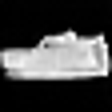

In [ ]:
display_image_grid(generated_images.detach().cpu(), images_per_row=1)